TensorFlow is a popular open-source software library for numerical computation using data flow graphs. It is used for machine learning, data science, and scientific computing.<br>
Keras is a high-level neural networks API, written in Python running on top of TensorFlow.<br>
Pandas is a Python library providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.<br>
NumPy is a Python library for scientific computing. It contains a powerful N-dimensional array object and random number capabilities.<br>
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression, clustering, and dimensionality reduction algorithms.

In [1]:
import tensorflow as tf
import keras as ks
from tensorflow.keras import layers
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
import matplotlib.pyplot as plt

Importing the csv file which contains all the historical data of the stock. <br>
Along with the dropna() function which removes all null values.

In [2]:
msft=pd.read_csv('/content/MSFT.csv').round(3).dropna()
aapl=pd.read_csv('/content/AAPL.csv').round(3).dropna()
nflx=pd.read_csv('/content/NFLX.csv').round(3).dropna()
tsla=pd.read_csv('/content/TSLA.csv').round(3).dropna()
goog=pd.read_csv('/content/GOOG.csv').round(3).dropna()
meta=pd.read_csv('/content/META.csv').round(3).dropna()
amzn=pd.read_csv('/content/AMZN.csv').round(3).dropna()

Here only necessary Data Columns are imported into a Panda Dataframe

In [3]:
def run(rawdata):
  data=pd.DataFrame()
  data['Open']=rawdata['Open'].astype(np.float64)
  data['High']=rawdata['High'].astype(np.float64)
  data['Low']=rawdata['Low'].astype(np.float64)
  data['Close']=rawdata['Close'].astype(np.float64)
  data['Currency']=rawdata['Currency'].astype(np.float64)
  data['Interest']=rawdata['Interest'].astype(np.float64)
  data['Inflation']=rawdata['Inflation'].astype(np.float64)
  data['Day']=rawdata['Day'].astype(np.int64)
  data['Month']=rawdata['Month'].astype(np.int64)
  data.head()
  return data

Creates a 3D array of a given stock data for time series prediction.
This function is commonly used in to prepare input data for time series forecasting models.
It creates a 3D array where each 2D slice represents a window of past 7 days of stock data, which can be used as input features for training time series prediction models.

    
    stockdata = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
    sliding_window(stockdata)
    array([[10, 11, 12, 13, 14, 15, 16],
          [11, 12, 13, 14, 15, 16, 17],
          [12, 13, 14, 15, 16, 17, 18]])

In [4]:
def sliding_window(stockdata):
  window_size=14
  windowed_data=[]
  for i in range(len(stockdata)-window_size):
      window=stockdata[i:i+window_size]
      windowed_data.append(window)
  return np.array(windowed_data)

Here the entire stock data is passed to create a sliding window ndarray with shape (days, 7, 9) 
where 7 is the no of days in a slice and 9 are the inputted economic indicators such as Inflation,Currency rate, previous Closing, Opening prices.

In [5]:
def window(data):
  inputdata=sliding_window(data)
  target = np.empty(len(inputdata))
  for i in range (len(target)):
    target[i]=data['Close'][i+14]
  return inputdata,target

In [6]:
stocks=[msft,aapl,meta,tsla,amzn,nflx,goog]
X=[]
Y=[]
for stock in stocks:
  x,y=window(run(stock))
  X.append(x)
  Y.append(y)
X=np.concatenate(X)
Y=np.concatenate(Y)

In [7]:
ind=7500
print(X[ind],Y[ind])

[[235.26  239.9   233.56  238.51    0.818   3.53    6.4    12.      1.   ]
 [237.    239.37  234.92  239.23    0.818   3.53    6.4    13.      1.   ]
 [237.97  240.91  237.09  240.35    0.818   3.53    6.4    17.      1.   ]
 [241.57  242.38  235.52  235.81    0.818   3.53    6.4    18.      1.   ]
 [233.78  235.52  230.68  231.93    0.818   3.53    6.4    19.      1.   ]
 [234.86  240.74  234.51  240.22    0.818   3.53    6.4    20.      1.   ]
 [241.1   245.17  239.65  242.58    0.818   3.53    6.4    23.      1.   ]
 [242.5   243.95  240.44  242.04    0.818   3.53    6.4    24.      1.   ]
 [234.48  243.3   230.9   240.61    0.818   3.53    6.4    25.      1.   ]
 [243.65  248.31  242.    248.      0.818   3.53    6.4    26.      1.   ]
 [248.99  249.83  246.83  248.16    0.818   3.53    6.4    27.      1.   ]
 [244.51  245.6   242.2   242.71    0.818   3.53    6.4    30.      1.   ]
 [243.45  247.95  242.95  247.81    0.818   3.53    6.4    31.      1.   ]
 [248.    255.18  245.47 

Data is split into Training and Testing dataset with an 80:20 split

In [8]:
index = np.arange(len(X))
np.random.shuffle(index)
X=X[index]
Y=Y[index]
X_train=X[:int(0.8*len(X))]
Y_train=Y[:int(0.8*len(Y))]
X_test=X[int(0.8*len(X)):]
Y_test=Y[int(0.8*len(Y)):]

In [9]:
ind=7500
print(X[ind],Y[ind])

[[23.816 23.925 23.429 23.921  0.621  1.72   2.    12.     9.   ]
 [24.192 24.482 24.099 24.392  0.621  1.72   2.    13.     9.   ]
 [24.641 24.892 24.567 24.689  0.621  1.72   2.    14.     9.   ]
 [24.977 24.993 24.808 24.992  0.621  1.72   2.    17.     9.   ]
 [24.996 25.083 24.872 25.068  0.621  1.72   2.    18.     9.   ]
 [25.009 25.142 24.985 25.075  0.621  1.72   2.    19.     9.   ]
 [24.97  25.002 24.772 24.954  0.621  1.72   2.    20.     9.   ]
 [25.086 25.181 24.977 25.003  0.621  1.72   2.    21.     9.   ]
 [24.531 24.826 24.393 24.671  0.621  1.72   2.    24.     9.   ]
 [24.581 24.742 24.036 24.055  0.621  1.72   2.    25.     9.   ]
 [23.884 24.025 23.614 23.756  0.621  1.72   2.    26.     9.   ]
 [23.725 24.363 23.584 24.333  0.621  1.72   2.    27.     9.   ]
 [24.241 24.325 23.812 23.825  0.621  1.72   2.    28.     9.   ]
 [23.97  24.17  23.446 23.55   0.622  1.75   2.2    1.    10.   ]] 23.618


Training Data is split into validation and training data with an 80:20 split using SciKit-learn

In [10]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_train,Y_train,test_size=0.2)

The metric list is defined, which contains various evaluation metrics to measure the performance of the model during training.

The neural network model is created using the Sequential class from the models module. It follows a sequential architecture.

An LSTM layer with 64 units is added to the model. The return_sequences=True argument ensures that the output of this layer is passed to the next layer in sequence. The activation='relu' argument sets the activation function to ReLU. The input_shape=(7, 9) specifies the shape of the input data for the first layer, where 7 represents the number of time steps (window size) and 9 represents the number of features (e.g., open price, close price, volume) for each time step. The dropout=0.1 and recurrent_dropout=0.1 arguments set the dropout rates for regularization.

A SimpleRNN layer with 16 units is added to the model. This layer uses the ReLU activation function.

A Dense layer with 1 unit is added as the output layer. This layer will provide the predicted value for stock prediction.

The model is compiled using the 'adam' optimizer and the mean squared error ('mse') loss function. The metric list is passed as an argument to evaluate the model performance during training.

The model.summary() function is used to display a summary of the model architecture, including the layer types, output shapes, and number of parameters.

In [26]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
model = models.Sequential()
model.add(layers.LSTM(256, return_sequences=True,activation='relu', input_shape=(14,9),dropout=0.1,recurrent_dropout=0.1))
model.add(layers.LSTM(128, activation='relu',dropout=0.1,recurrent_dropout=0.1))
model.add(layers.Dense(32))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=metric)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 256)           272384    
                                                                 
 lstm_7 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 473,665
Trainable params: 473,665
Non-trainable params: 0
_________________________________________________________________


The below code block trains the neural network model for stock prediction and evaluates its performance.<br>
An EarlyStopping callback is created to monitor the mean absolute percentage error.<br>
It stops the training process if there is no improvement in the monitored metric for 4 consecutive epochs.<br>
The restore_best_weights=True argument ensures that the best weights of the model are restored.<br>
The performance metrics are evaluated using the model.evaluate() function on the validation data.<br>


In [27]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test),callbacks=[stop],batch_size=128)

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/20
187/187 [==============================] - 16s 62ms/step - loss: 1387.0730 - root_mean_squared_error: 37.2434 - mean_absolute_error: 14.6225 - mean_absolute_percentage_error: 35.3969 - mean_squared_logarithmic_error: 0.1486 - val_loss: 77.9712 - val_root_mean_squared_error: 8.8301 - val_mean_absolute_error: 3.7668 - val_mean_absolute_percentage_error: 13.1959 - val_mean_squared_logarithmic_error: 0.0128
Epoch 2/20
187/187 [==============================] - 11s 60ms/step - loss: 206.2625 - root_mean_squared_error: 14.3618 - mean_absolute_error: 6.1154 - mean_absolute_percentage_error: 15.0491 - mean_squared_logarithmic_error: 0.0168 - val_loss: 81.4078 - val_root_mean_squared_error: 9.0226 - val_mean_absolute_error: 3.8135 - val_mean_absolute_percentage_error: 9.5144 - val_mean_squared_logarithmic_error: 0.0080
Epoch 3/20
187/187 [==============================] - 11s 59ms/step - loss: 175.9381 - root_mean_squared_error: 13.2642 - mean_absolute_error: 5.4970 - mean_absolute_p

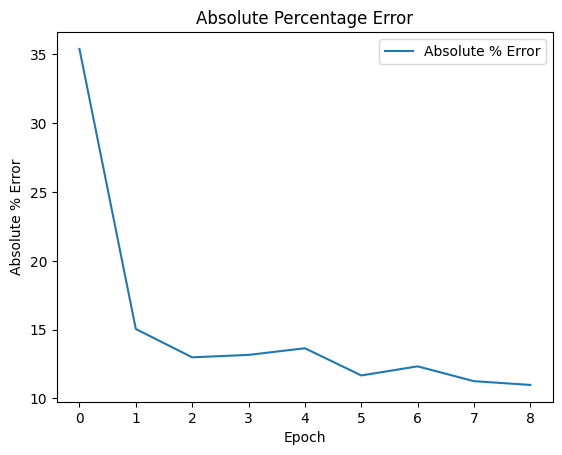

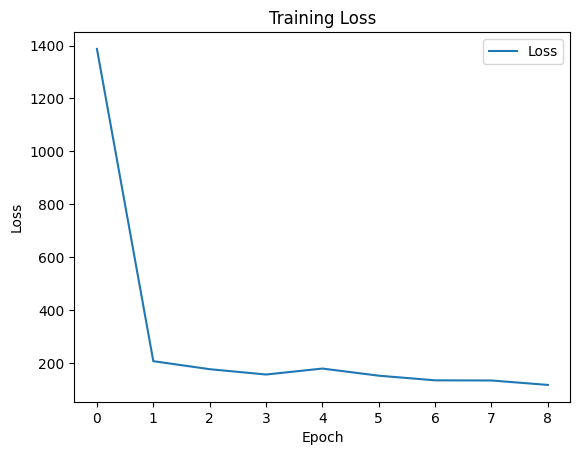

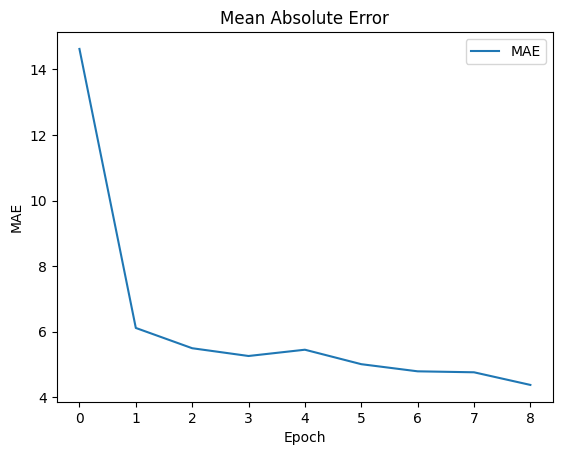

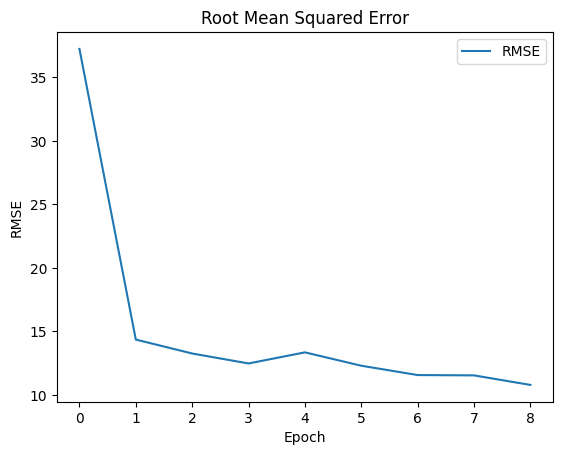

In [28]:
absolute_percentage_error = history.history['mean_absolute_percentage_error']
loss = history.history['loss']
mse = history.history['mean_absolute_error']
rmse = history.history['root_mean_squared_error']

# Plot the absolute percentage error
plt.plot(absolute_percentage_error, label='Absolute % Error')
plt.title('Absolute Percentage Error')
plt.xlabel('Epoch')
plt.ylabel('Absolute % Error')
plt.legend()
plt.show()

# Plot the loss
plt.plot(loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the MSE
plt.plot(mse, label='MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot the RMSE
plt.plot(rmse, label='RMSE')
plt.title('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [30]:
test_loss, rmse, mae, mape, msle = model.evaluate(X_test,Y_test,verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

234/234 [==============================] - 3s 11ms/step - loss: 66.6260 - root_mean_squared_error: 8.1625 - mean_absolute_error: 2.9886 - mean_absolute_percentage_error: 12.3829 - mean_squared_logarithmic_error: 0.0070

Mean Squared Error:  66.62604522705078
Root Mean Squared Error:  8.162477493286133
Mean Absolute Error:  2.9885852336883545
Mean Absolute Percentage Error:  12.382902145385742
Mean Squared Logarithmic Error:  0.007045842707157135
Want to save model?
y


236/236 [==============================] - 3s 12ms/step


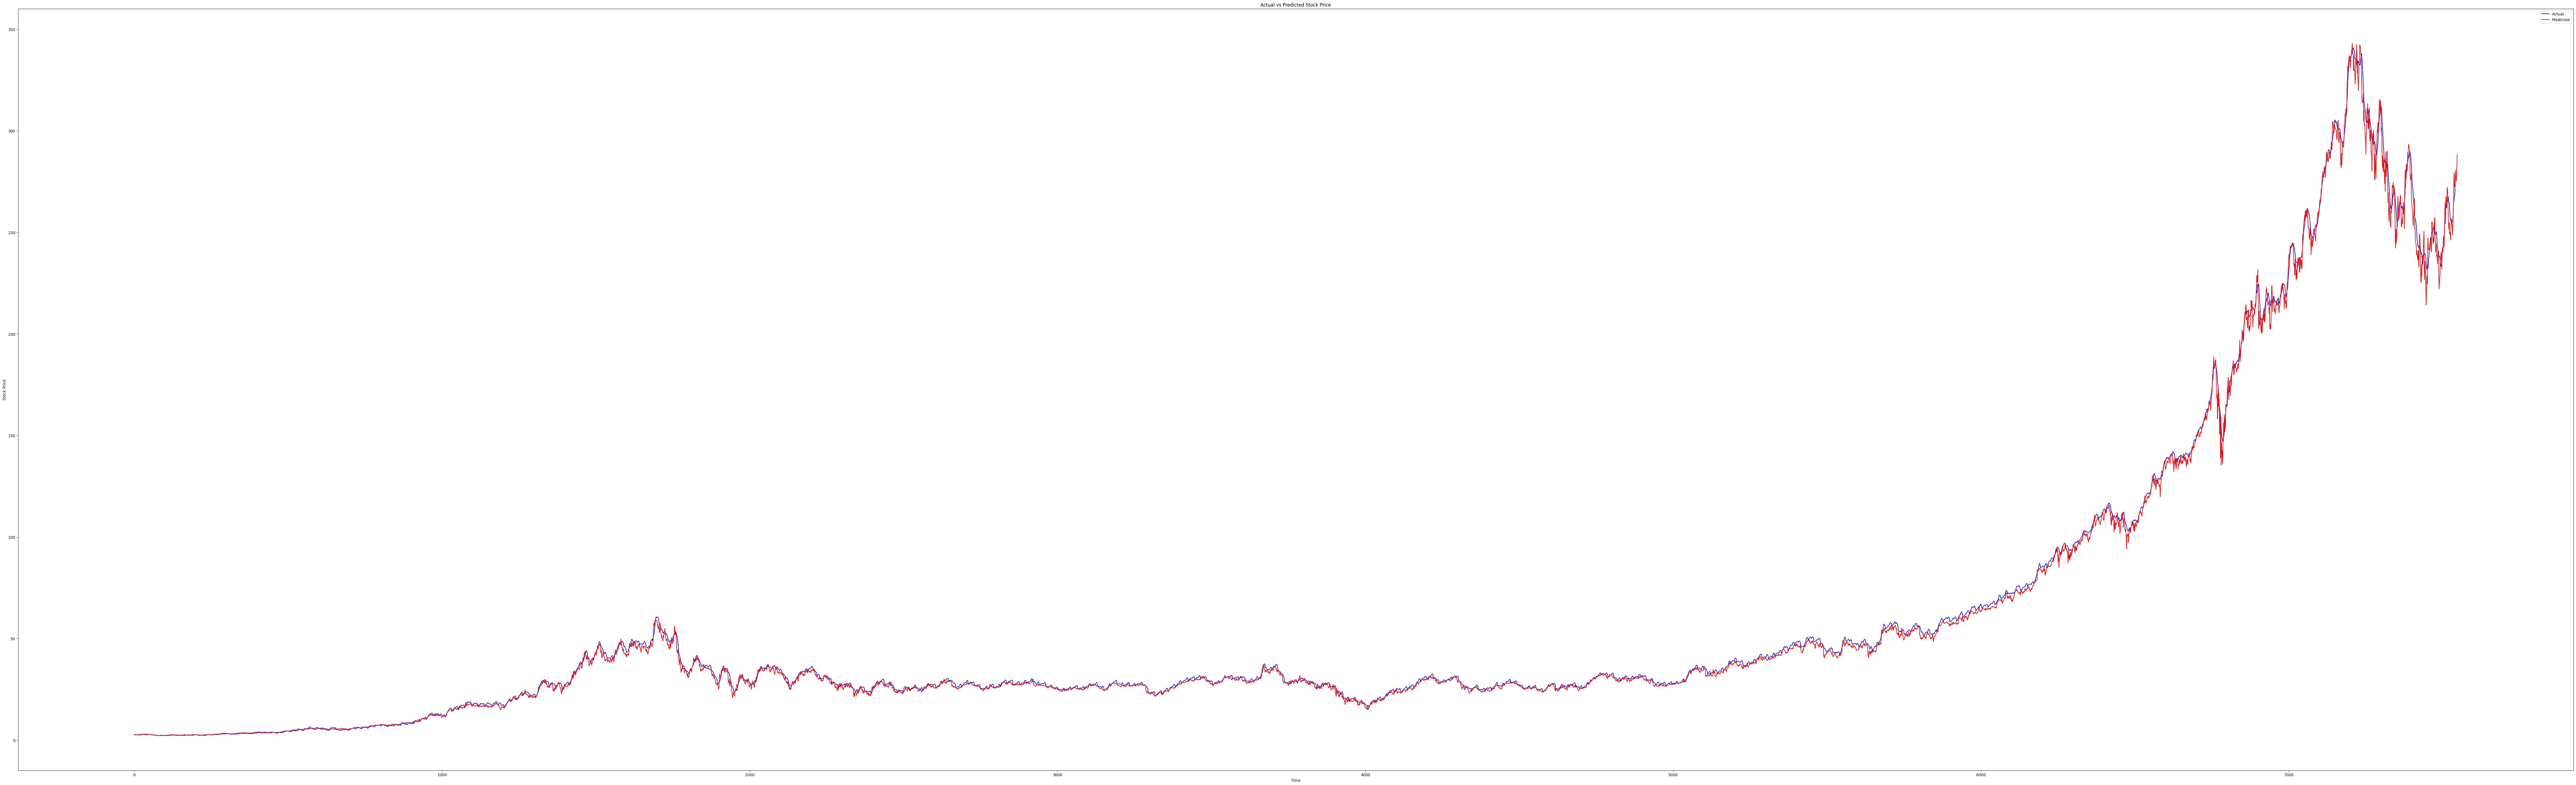

236/236 [==============================] - 2s 10ms/step


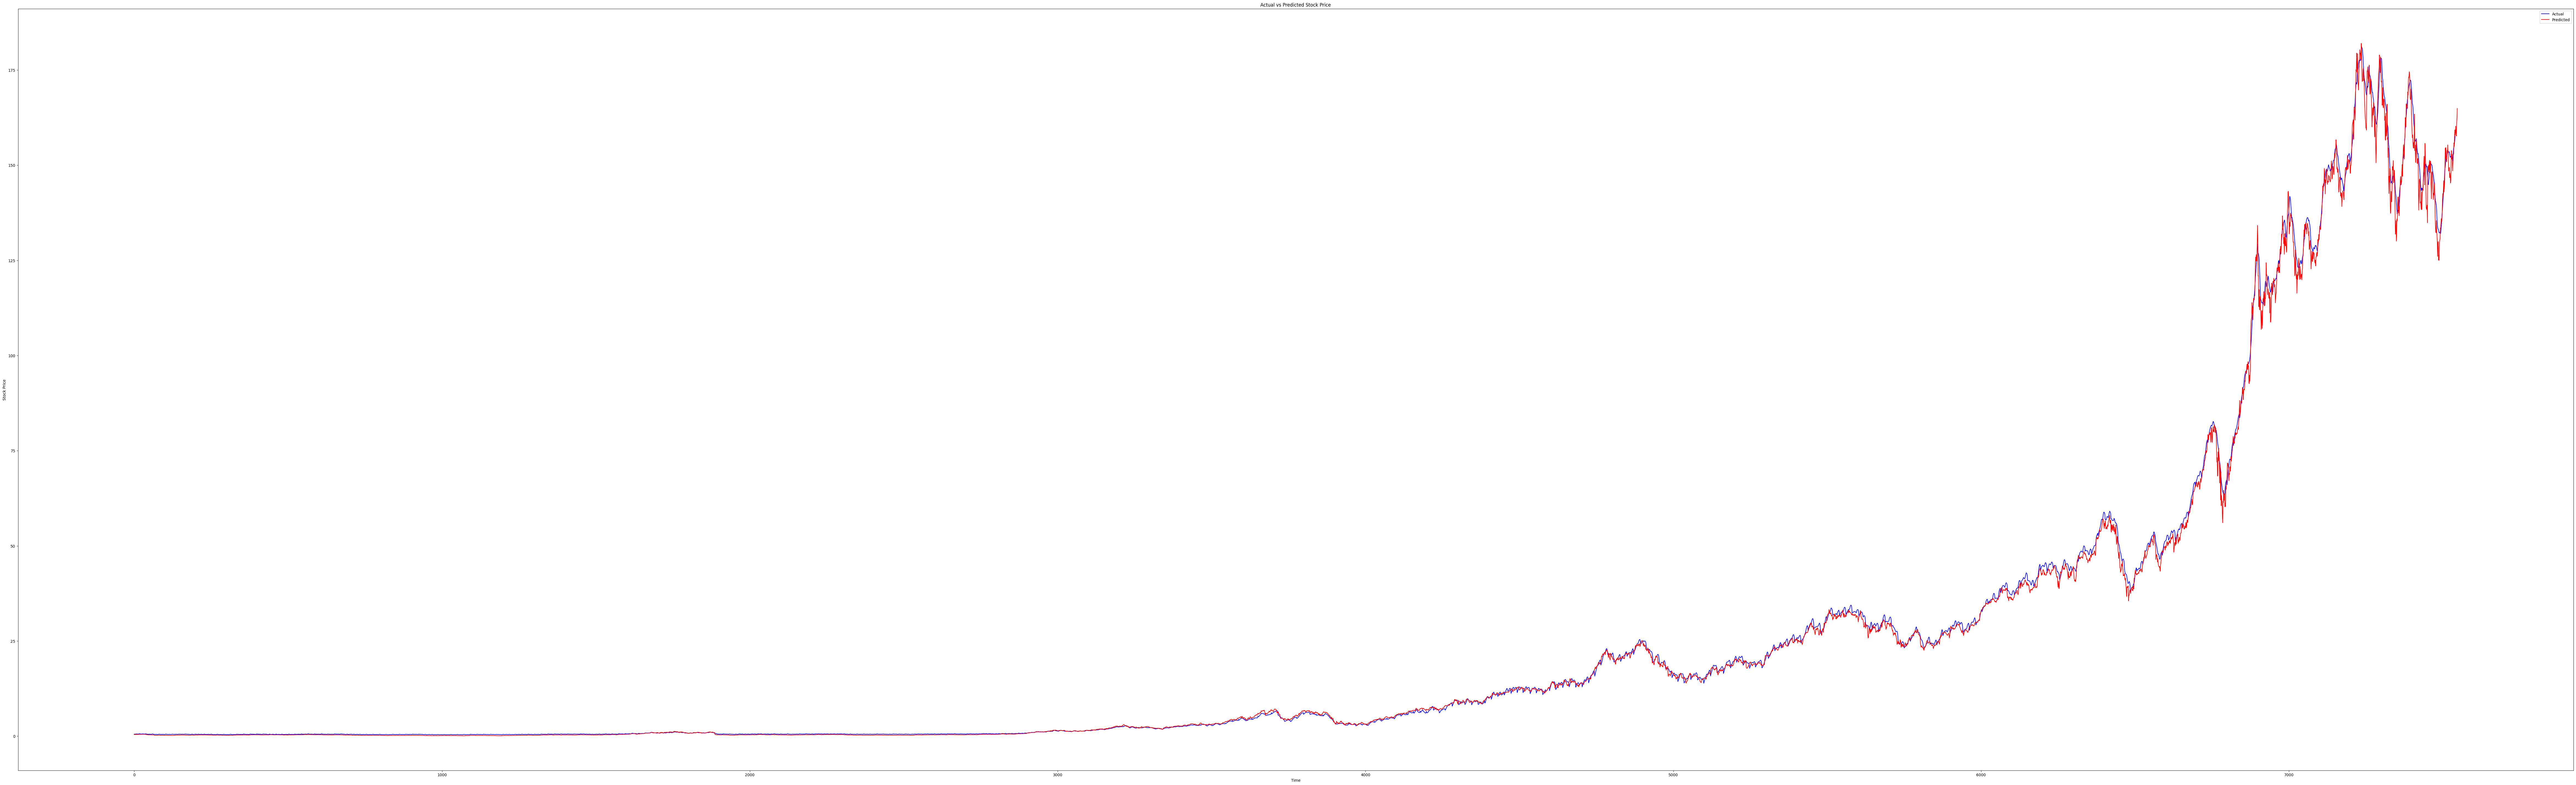

85/85 [==============================] - 1s 11ms/step


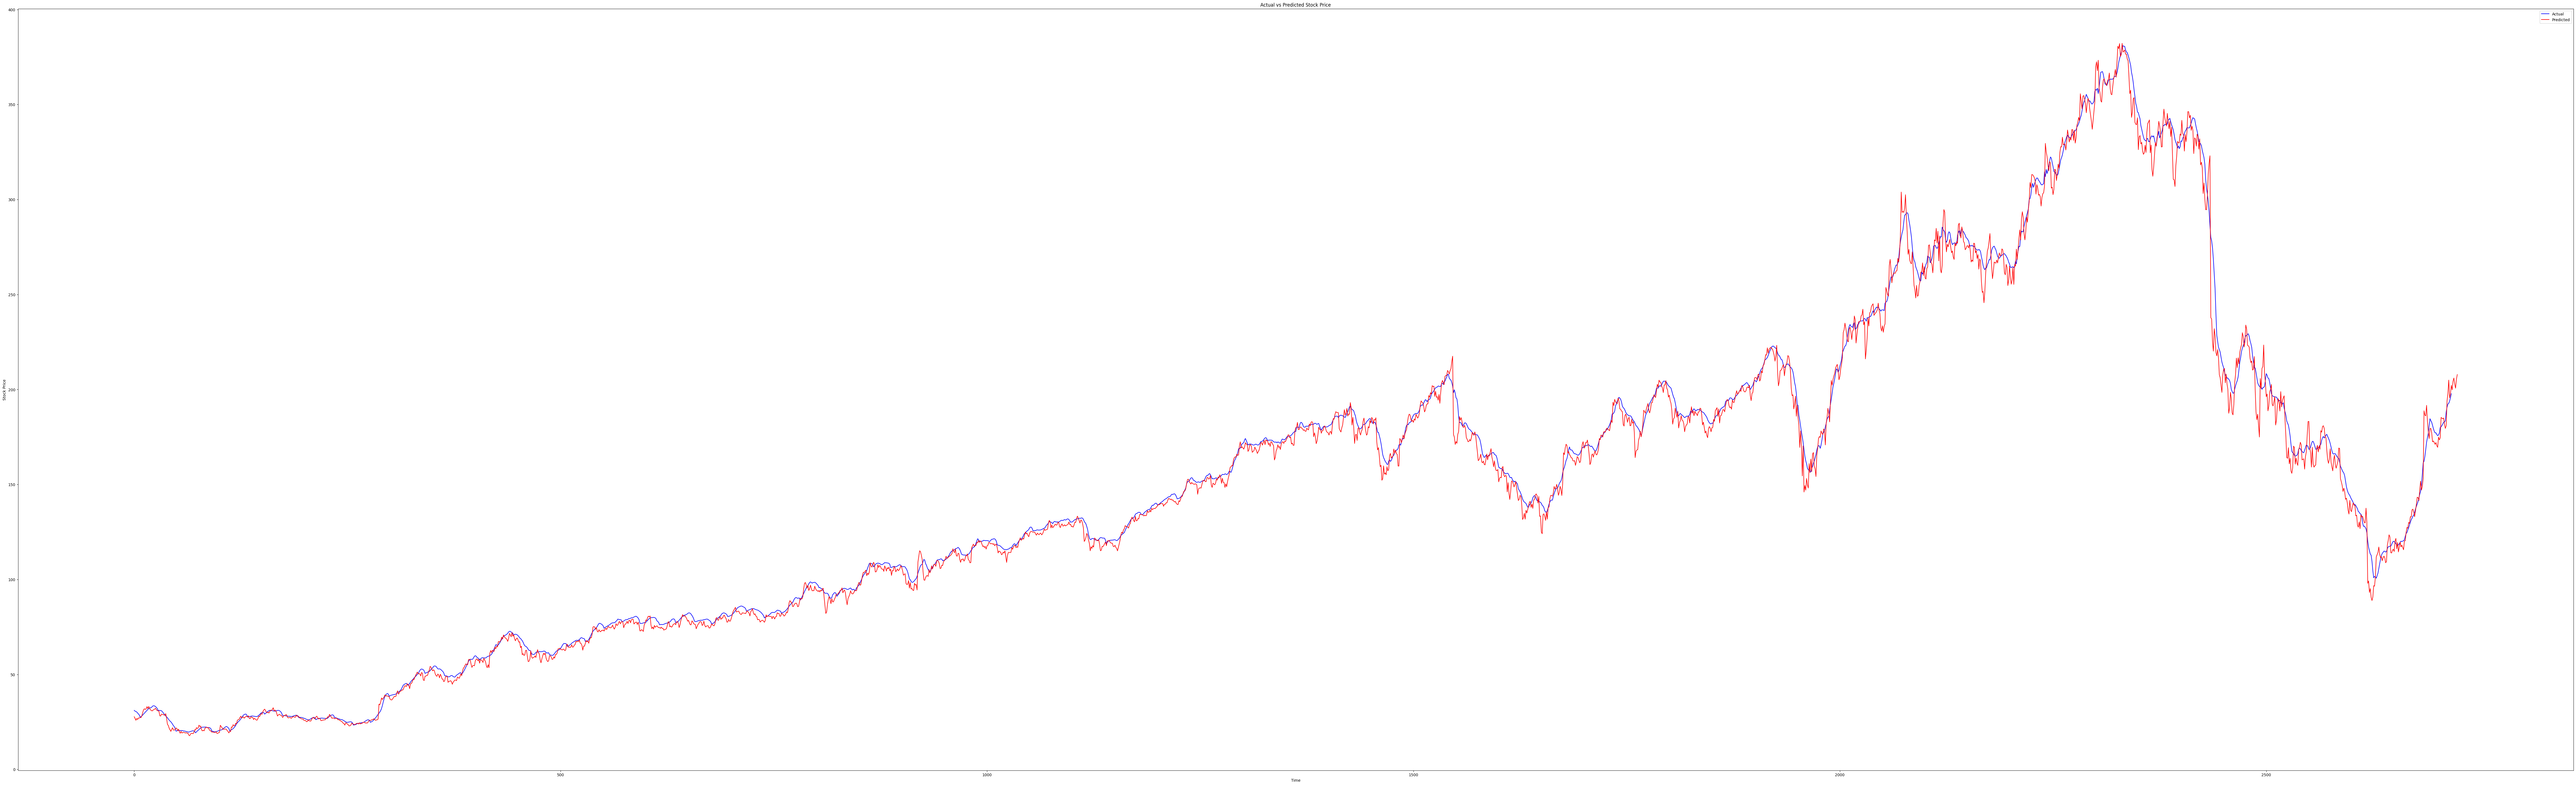

100/100 [==============================] - 1s 12ms/step


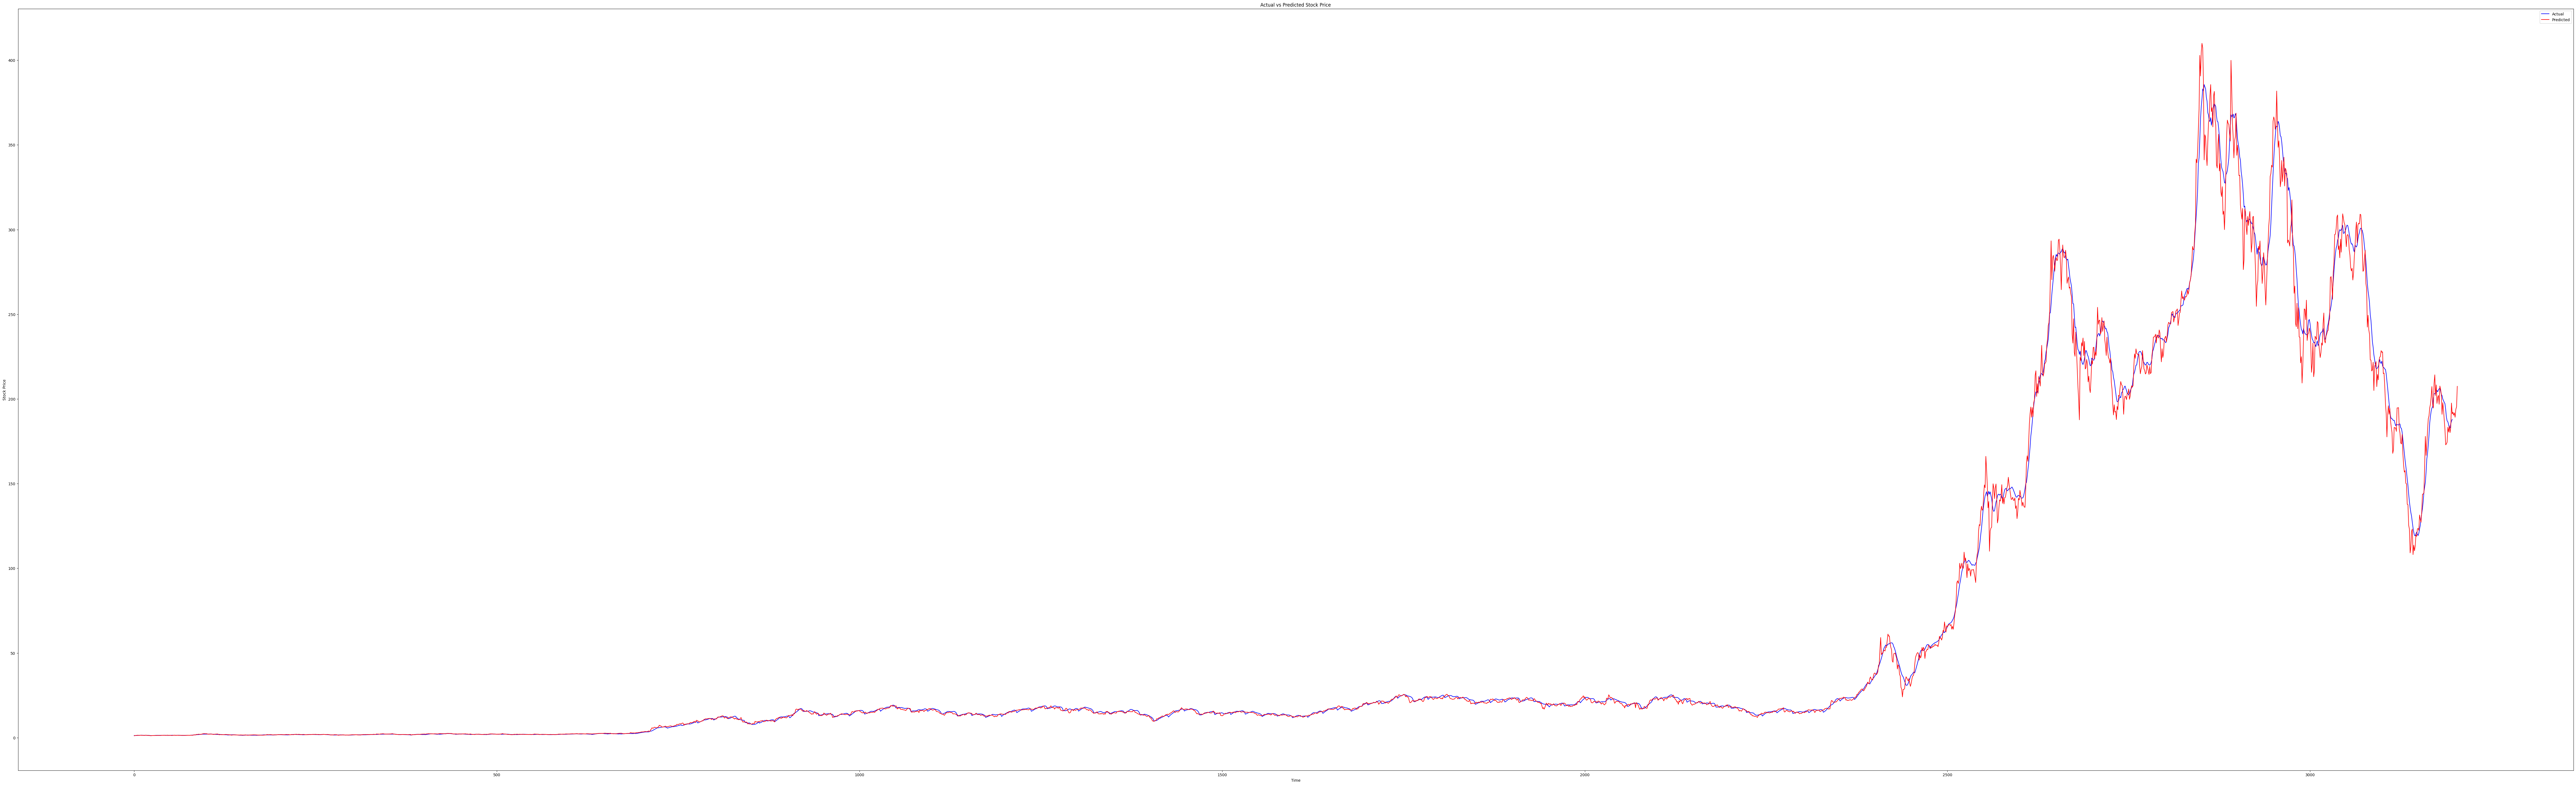

204/204 [==============================] - 3s 16ms/step


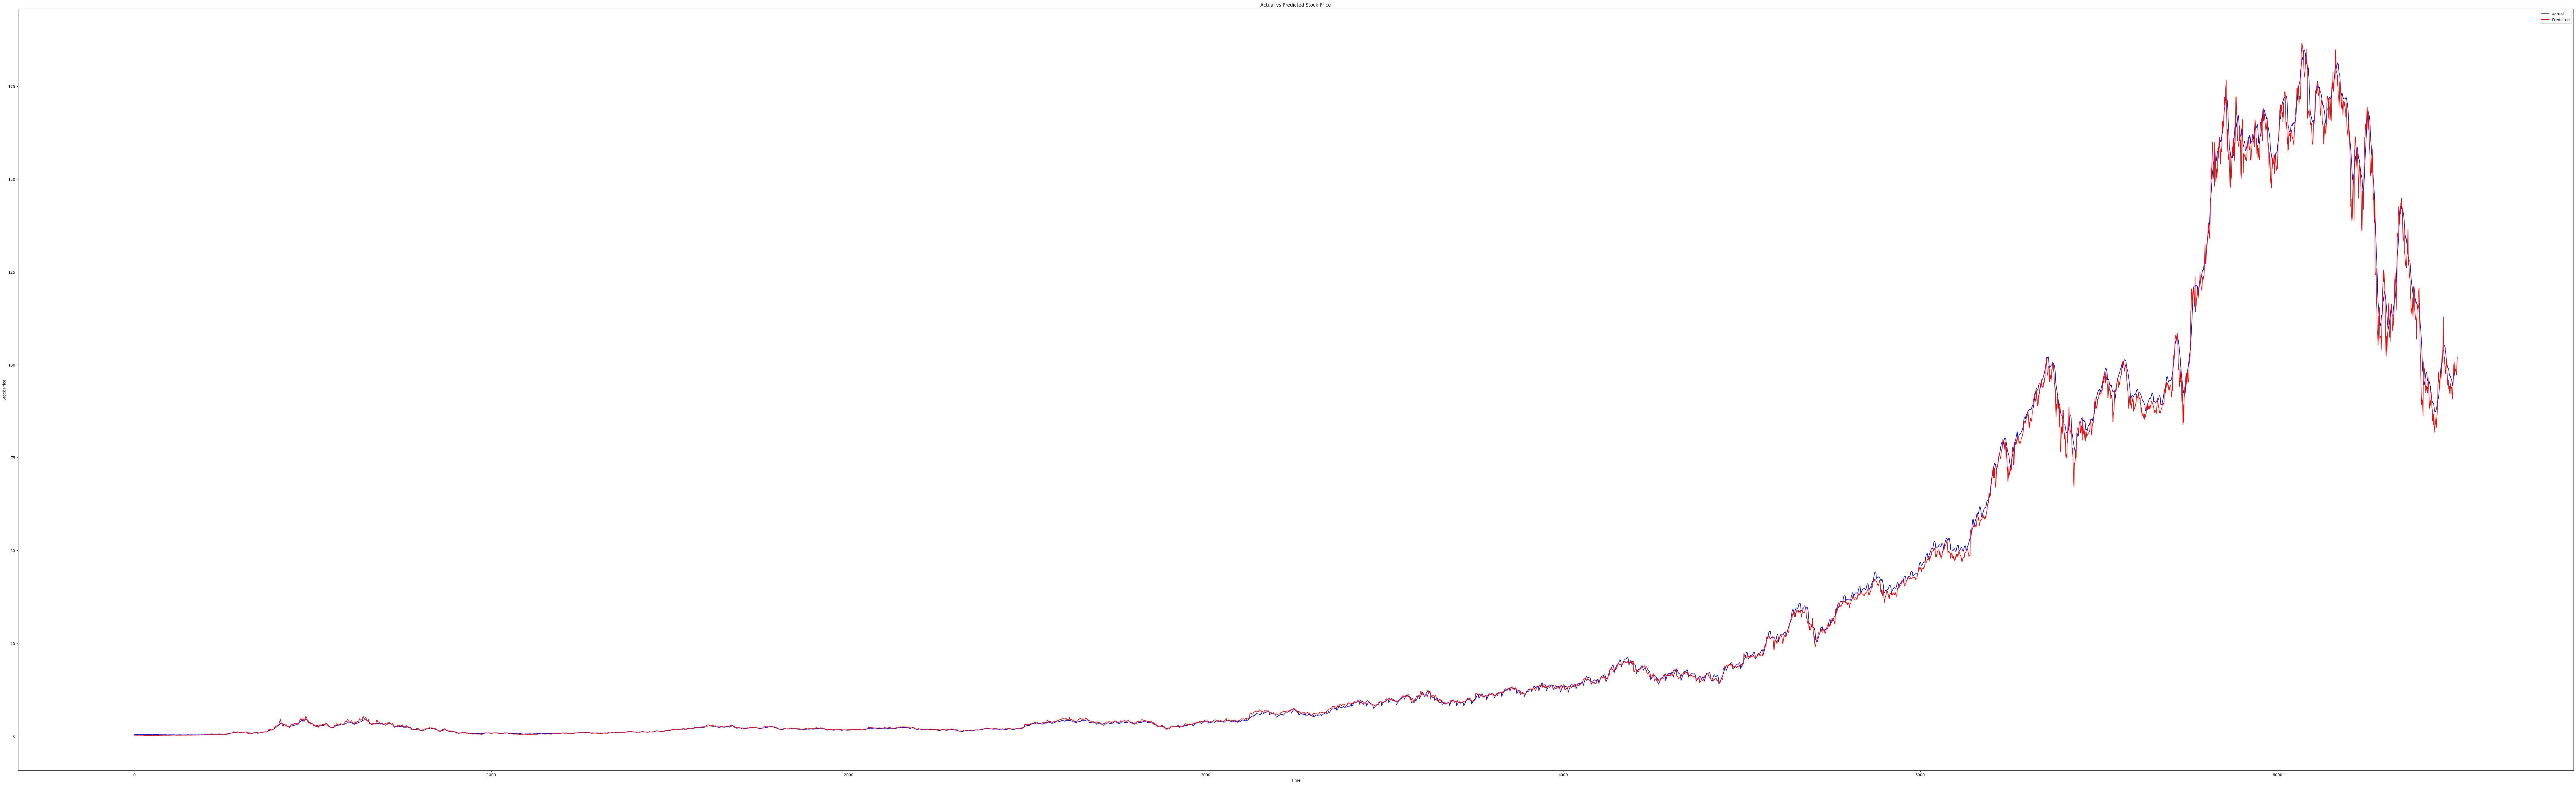

164/164 [==============================] - 2s 14ms/step


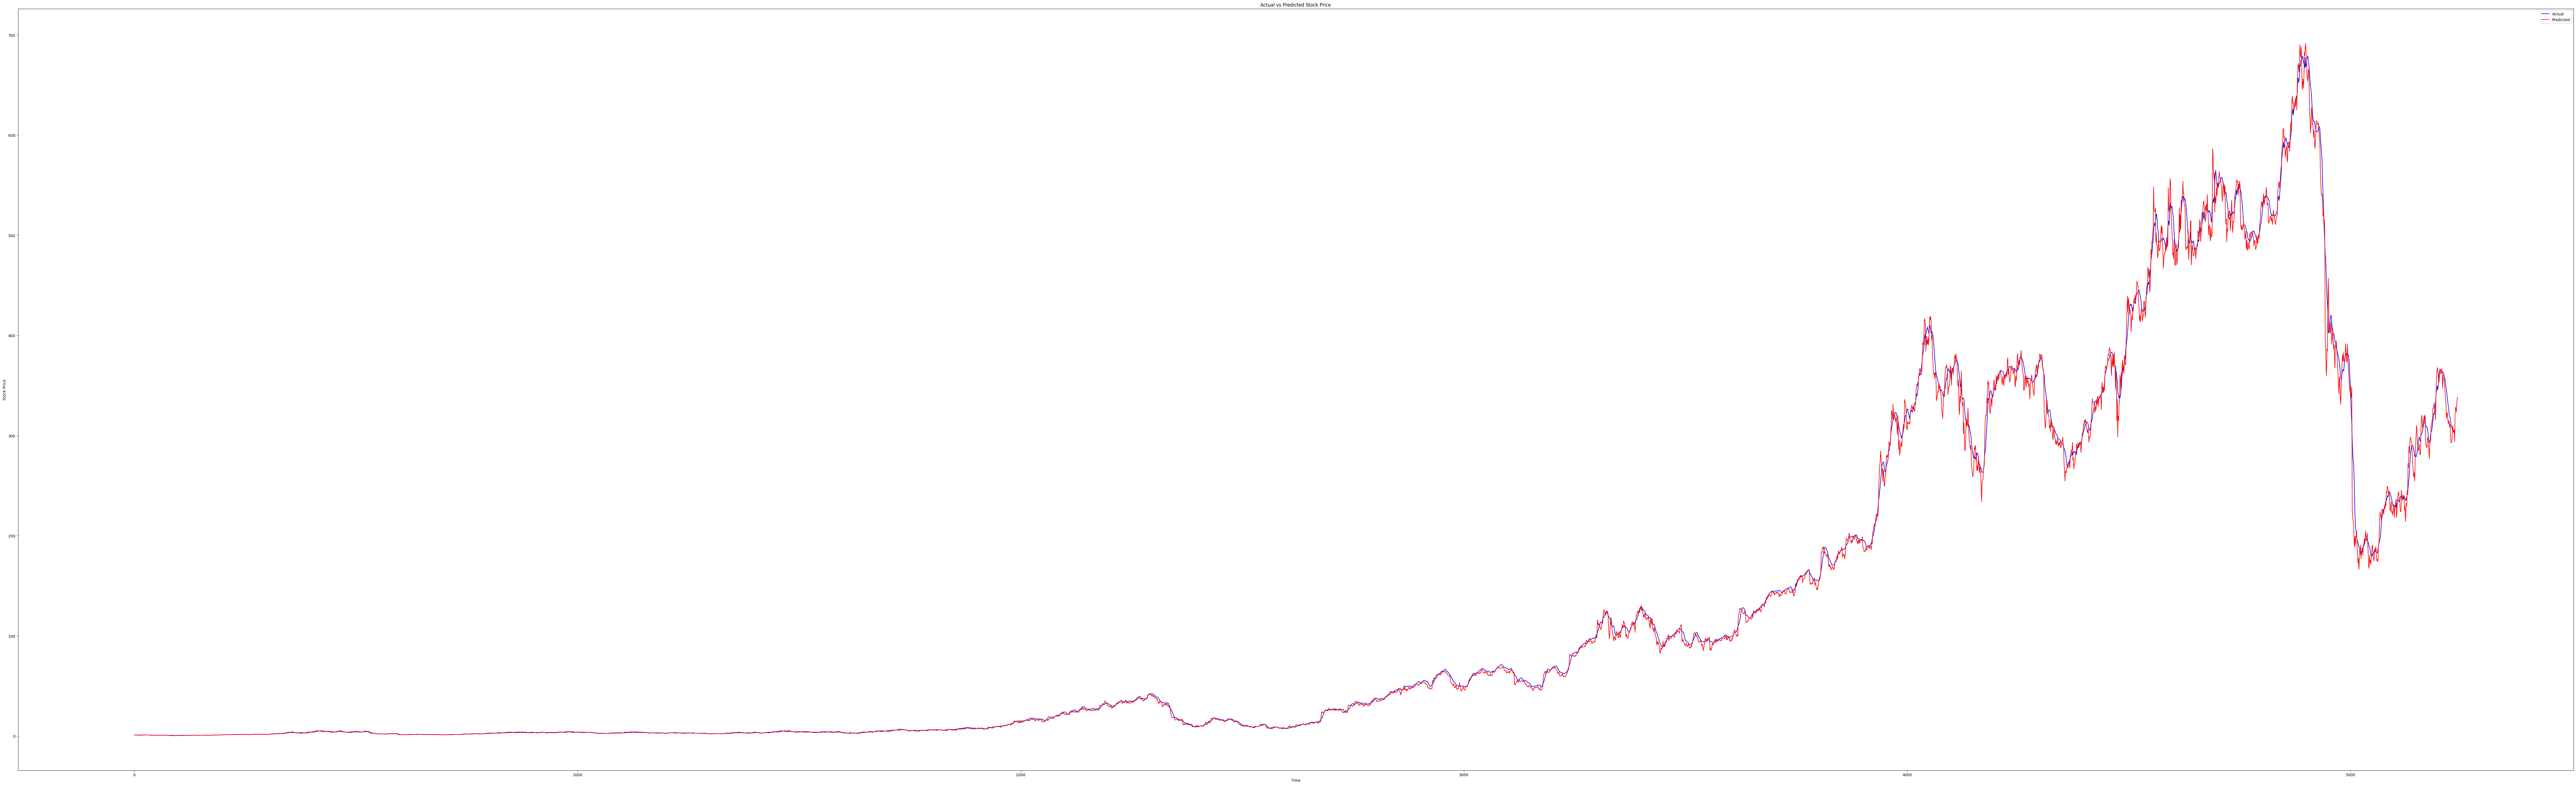

146/146 [==============================] - 2s 15ms/step


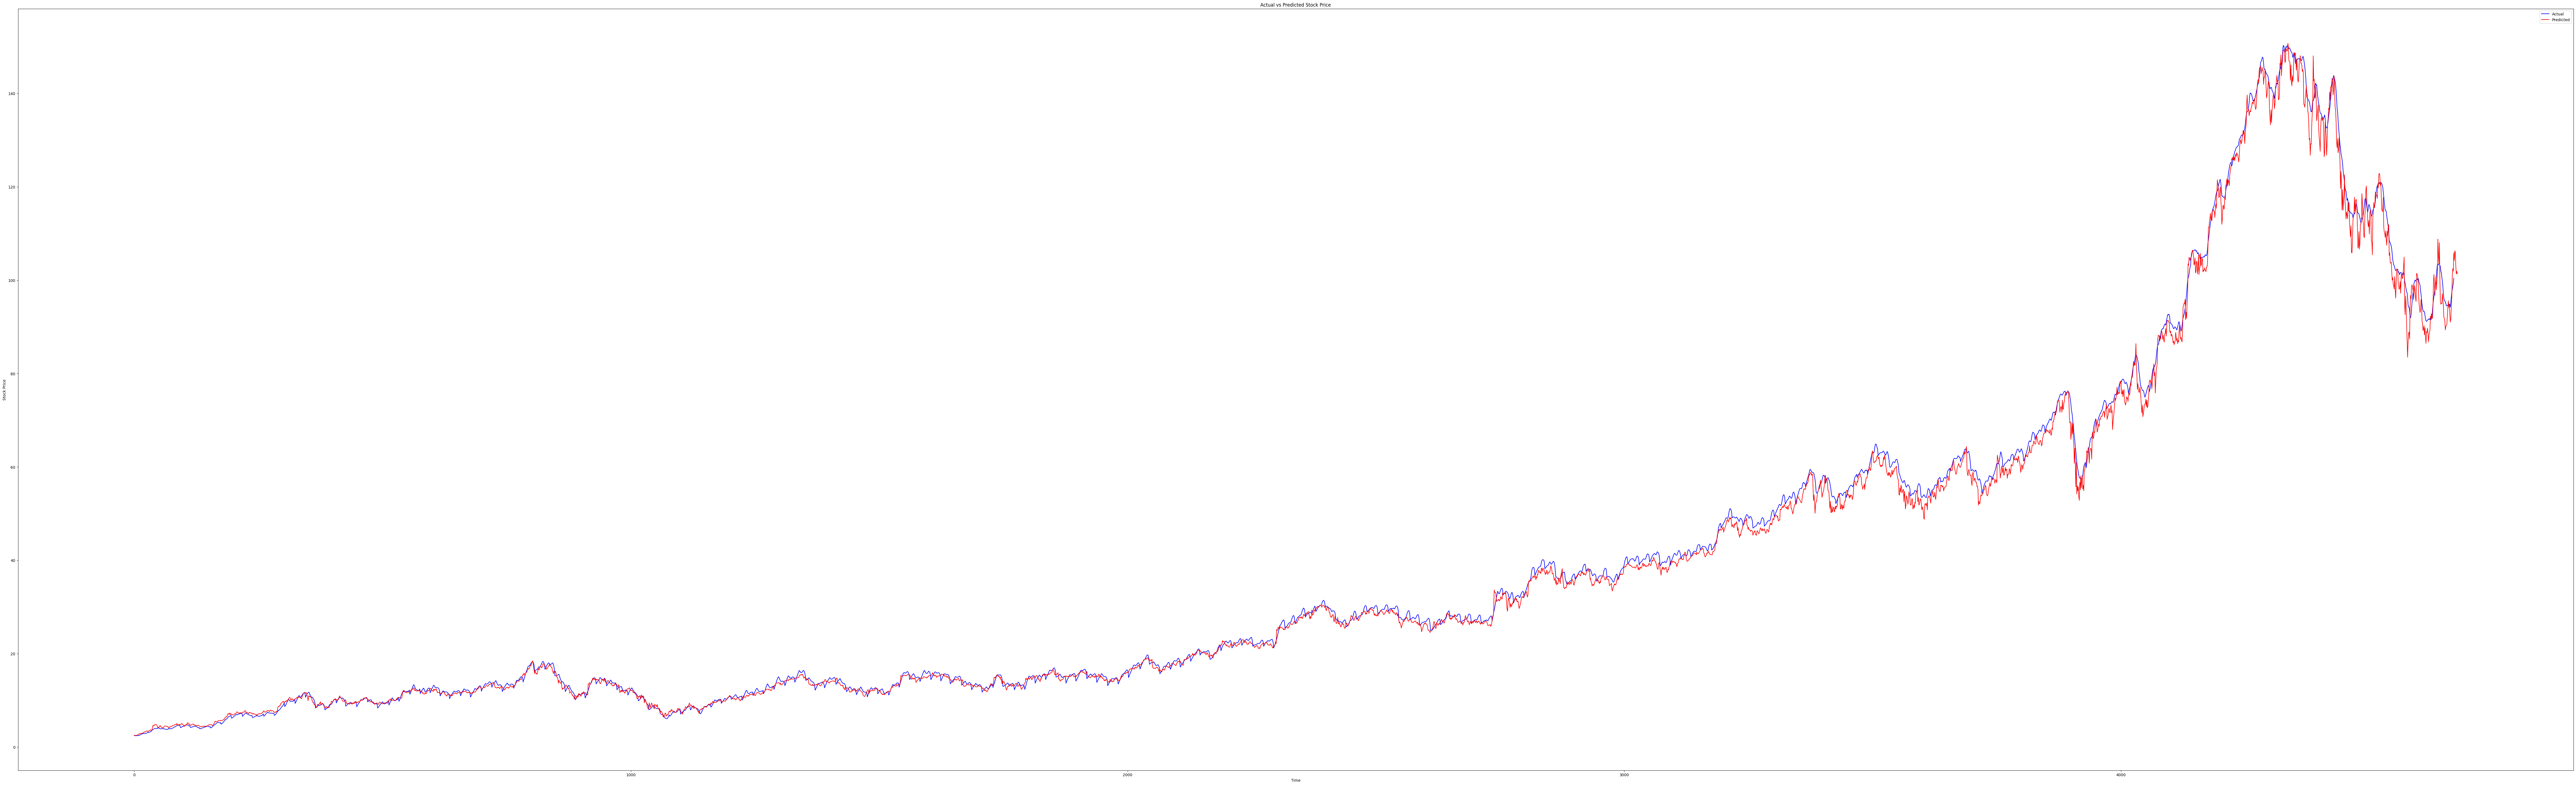

In [31]:
for stock in stocks:
  predicted_prices=model.predict(sliding_window(run(stock)))
  actual_prices=stock['Close'].values
  time=0
  X=predicted_prices[time:]
  Y=actual_prices[time+7:]
  fig, ax = plt.subplots(figsize=(120,36))
  plt.plot(X, color='blue', label='Actual')
  plt.plot(Y, color='red', label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.title('Actual vs Predicted Stock Price')
  plt.legend()
  plt.show()

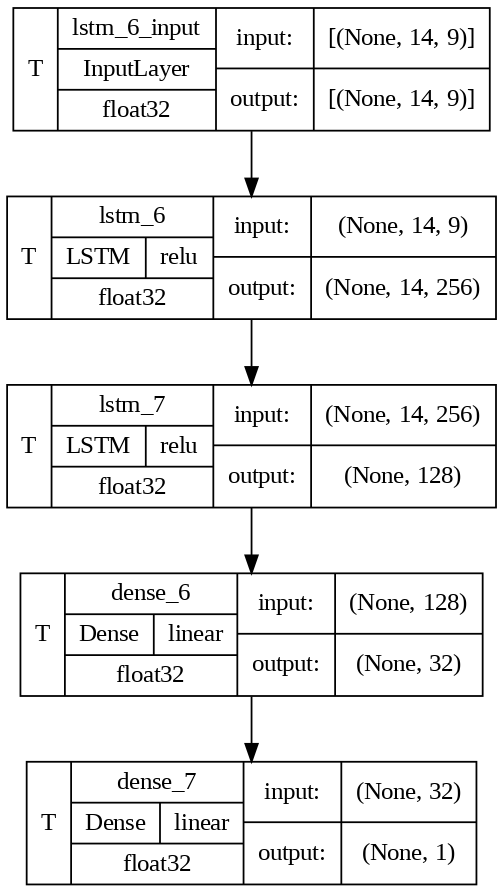

In [32]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=128,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True,
)